# CV Final Project: MASK IT

### Team members:
<b> Dhaval Popat - dkp288 <br>
Sonit Samal - ss11354 <br>
Vikram Bajaj - vsb259 <br>
Yash Panchamia - ygp210 </b>

In [61]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## 1. Feature Detection

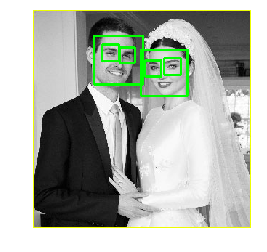

In [44]:
# load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')
haar_eye_cascade = cv2.CascadeClassifier('data/haarcascade_eye.xml')

# load test image
test = cv2.imread('images/miranda-kerr-evan-spiegel.jpg')
# test = cv2.imread('images/evan-spiegel.jpg')

faces = haar_face_cascade.detectMultiScale(test, scaleFactor=1.05, minNeighbors=5)

for (fx, fy, fw, fh) in faces:
    roi_face = test[fy:fy+fh, fx:fx+fw]
    eyes = haar_eye_cascade.detectMultiScale(roi_face, scaleFactor=1.01, minNeighbors=8)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_face, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

# go over list of faces and draw rectangles
for (fx, fy, fw, fh) in faces:
    cv2.rectangle(test, (fx, fy), (fx+fw, fy+fh), (0, 255, 0), 2)

# convert image to RGB and show image
plt.axis('off')
plt.imshow(convertToRGB(test))


## 2. Overlaying the mask

In [70]:
def blend_transparent(face_image, overlay_image):
    
    # split out the transparency mask from the color information
    overlay_color = overlay_image[:,:,:3] # Grab the BRG planes
    overlay_mask = overlay_image[:,:,3:]  # And the alpha plane

    # calculate the inverse mask
    background_mask = 255 - overlay_mask

    # turn the masks into three channel to use them as weights
    overlay_mask = cv2.cvtColor(overlay_mask, cv2.COLOR_GRAY2BGR)
    background_mask = cv2.cvtColor(background_mask, cv2.COLOR_GRAY2BGR)

    # create a masked out face image and masked out overlay
    # convert the images to floating point in range 0.0 - 1.0
    face_part = (face_image * (1 / 255.0)) * (background_mask * (1 / 255.0))
    overlay_part = (overlay_color * (1 / 255.0)) * (overlay_mask * (1 / 255.0))

    # add them together and rescale it back to an 8bit integer image    
    return np.uint8(cv2.addWeighted(face_part, 255.0, overlay_part, 255.0, 0.0))

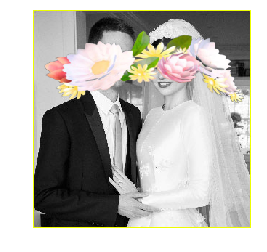

In [77]:
test = cv2.imread('images/evan-spiegel.jpg')
test = cv2.imread('images/miranda-kerr-evan-spiegel.jpg')
mask_flower = cv2.imread('masks/flower.png', cv2.IMREAD_UNCHANGED)
dimensions = test.shape[1], test.shape[0]
mask_flower = cv2.resize(mask_flower, dimensions, interpolation=cv2.INTER_AREA)

result = blend_transparent(test, mask_flower)

# convert image to RGB and show image
plt.axis('off')
plt.imshow(convertToRGB(result))